In [31]:
from skimage import io, segmentation
import os
import cv2
import numpy as np

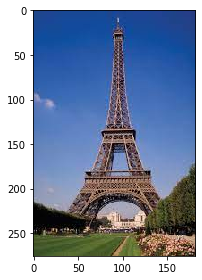

In [3]:
images_dir = os.path.join('data')
image_name = 'eiffel.jpeg' 
image_dir = os.path.join(images_dir, image_name)
img = io.imread(image_dir)
io.imshow(img)

In [23]:
img.shape

(276, 182, 3)

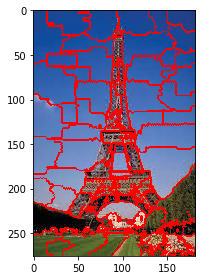

In [4]:
sigma = 4
max_dist = 10
ratio = 1/2
superpixels = segmentation.quickshift(img, kernel_size=sigma, max_dist=max_dist, ratio=ratio)
io.imshow(segmentation.mark_boundaries(img, superpixels, color=(1,0,0), mode='inner'))

In [71]:
idx_superpixel = 1
idx_image = np.where(superpixels == idx_superpixel)
image_superpixel = img[idx_image]
#print(idx_image)
#image_superpixel.shape

In [78]:
ma = np.random.normal(size=(2,5,3))
mask = np.array([[0, 0, 1, 1, 1], [0, 0, 0, 1, 1]])
print(ma.shape)
print(mask.shape)

(2, 5, 3)
(2, 5)


In [103]:
print(ma)
print('--------')
print(mask)

[[[ 1.98227206  0.73059963  1.42856207]
  [-0.21095372 -0.71431308  0.69517969]
  [ 0.80664696 -0.90264463  1.31342504]
  [ 0.28610515 -0.76716335 -0.89749778]
  [-1.24273954  0.81117216  0.73242177]]

 [[ 0.45032985 -1.15063414 -1.44802085]
  [ 2.43746827  2.12184004  1.17120453]
  [-0.27844275 -1.02006387 -1.60246757]
  [-0.73907027  1.23819514  0.54108387]
  [-1.23910908  0.42380911  0.08020499]]]
--------
[[0 0 1 1 1]
 [0 0 0 1 1]]


In [116]:
for sp in np.unique(mask):
    print(sp)
    idx_mask = np.where(mask == sp)
    min_idx = np.min(idx_mask, axis=-1)
    max_idx = np.max(idx_mask, axis=-1)
    print(min_idx)
    print(max_idx)
    slice_list = []
    for min_val, max_val in zip(min_idx, max_idx):
        slice_dim = slice(min_val, max_val+1, 1)
        slice_list.append(slice_dim)
    print(slice_list)

0
[0 0]
[1 2]
[slice(0, 2, 1), slice(0, 3, 1)]
1
[0 2]
[1 4]
[slice(0, 2, 1), slice(2, 5, 1)]


In [99]:
ma[tuple(slice_list)]

array([[[ 1.98227206,  0.73059963,  1.42856207],
        [-0.21095372, -0.71431308,  0.69517969],
        [ 0.80664696, -0.90264463,  1.31342504]],

       [[ 0.45032985, -1.15063414, -1.44802085],
        [ 2.43746827,  2.12184004,  1.17120453],
        [-0.27844275, -1.02006387, -1.60246757]]])

## Trash

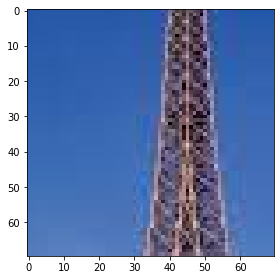

In [56]:
img3 = img[50:120, 50:120, :]
io.imshow(img3)